# 1. Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import warnings 
warnings.filterwarnings('ignore')


#pip install --upgrade seaborn
#pip install --upgrade matplotlib

# 2. Load the Data

In [16]:
data = pd.read_csv('/Users/aycan/Documents/Greenbootcamps04032024/DS_final_project/data/output.csv')

In [17]:
df = pd.DataFrame(data)

In [18]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [19]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,model,km_driven_binned,engine_binned,mileage_binned,max_power_binned
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Swift,140000-149999,1200-1299,20-24.990000000000002,60-79
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Rapid,120000-129999,1400-1499,20-24.990000000000002,100-119
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,City,140000-149999,1400-1499,15-19.990000000000002,60-79
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,i20,120000-129999,1300-1399,20-24.990000000000002,80-99
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Swift,120000-129999,1200-1299,15-19.990000000000002,80-99


# 3. Split the Data

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.compose
import sklearn
import tabulate


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(['selling_price'], axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
print("Training set shape(df_train):", df_train.shape)
print("Testing set shape(df_test):", df_test.shape)

Training set shape(df_train): (5373, 17)
Testing set shape(df_test): (1344, 17)


# 4. Scaling and Encoding

In [23]:
#Standard Scaler and One Hot Encoder

numerical_attributes=X_train.select_dtypes(include=["float64","int64"]).columns
categorical_attributes=X_train.select_dtypes(include="object").columns

ct=sklearn.compose.ColumnTransformer(
    [("Standard_scaling",sklearn.preprocessing.StandardScaler(),numerical_attributes), 
     ("One_hot_encoding",sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"),
      categorical_attributes)])

ct.fit(X_train)
X_train=ct.transform(X_train)
X_test=ct.transform(X_test)
print("x_train :",X_train.shape)
print("x_test :",X_test.shape)

x_train : (5373, 334)
x_test : (1344, 334)


# 5.Model Building and Training

In [24]:
#Model Selection

#1 Linear Regression

#2 GradientBoostingRegressor

In [25]:
#1 Linear Regression

grid = {'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [None, -1, 1, 2]    }

model1_linear = GridSearchCV(LinearRegression(), grid, scoring='r2', cv=5, n_jobs=-1)
model1_linear.fit(X_train, y_train)

print("R^2 score of the best Linear Regressions model: {:.3f}".format(model1_linear.best_score_))
print("Best hyperparameter of Linear Regressions model:", model1_linear.best_params_)

R^2 score of the best Linear Regressions model: 0.767
Best hyperparameter of Linear Regressions model: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}


In [26]:
#2 GradientBoostingRegressor

grid = {"n_estimators": [150, 200, 250],"max_depth": [4,5,6],"learning_rate": [0.05, 0.1,0.2]
}
model2_boosting = GridSearchCV( estimator=GradientBoostingRegressor(), param_grid=grid, scoring="r2", cv=5)
model2_boosting.fit(X_train, y_train)

print("R^2 score of the best Gradient Boosting Regressor = {:.2f}".format(model2_boosting.best_score_))
print("Best hyperparameter of Gradient Boosting Regressor = {}".format(model2_boosting.best_params_))

R^2 score of the best Gradient Boosting Regressor = 0.91
Best hyperparameter of Gradient Boosting Regressor = {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}


In [27]:
#Gradient Boosting Regressor is better than Linear Regression

# 6. Model Evaluation

In [28]:
# Model Assessment

y_predicted = model2_boosting.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_predicted)

print("Root Mean Squared Error: {:.2f}".format(rmse))
print("Mean Absolute Error : {:.2f}".format(mae))
print("Mean Squared Error : {:.2f}".format(mse))
print("R^2 Score: {:.2f}".format(r2))

Root Mean Squared Error: 112034.16
Mean Absolute Error : 67283.72
Mean Squared Error : 12551653520.45
R^2 Score: 0.94


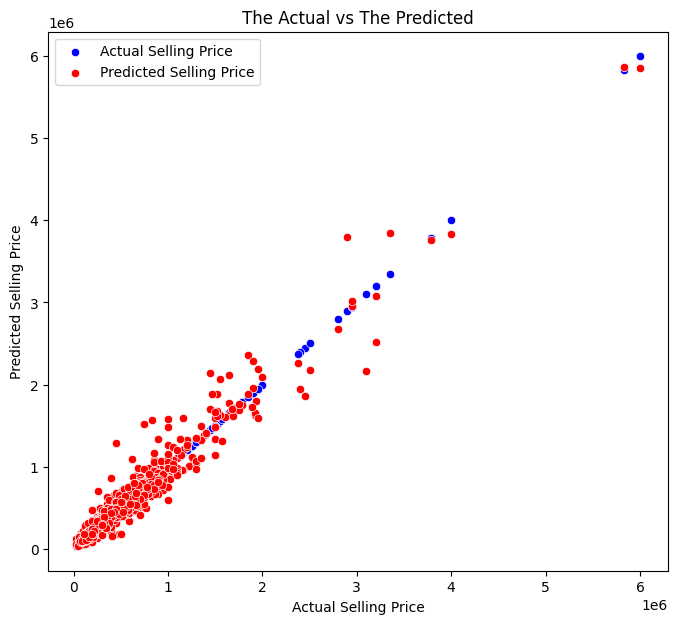

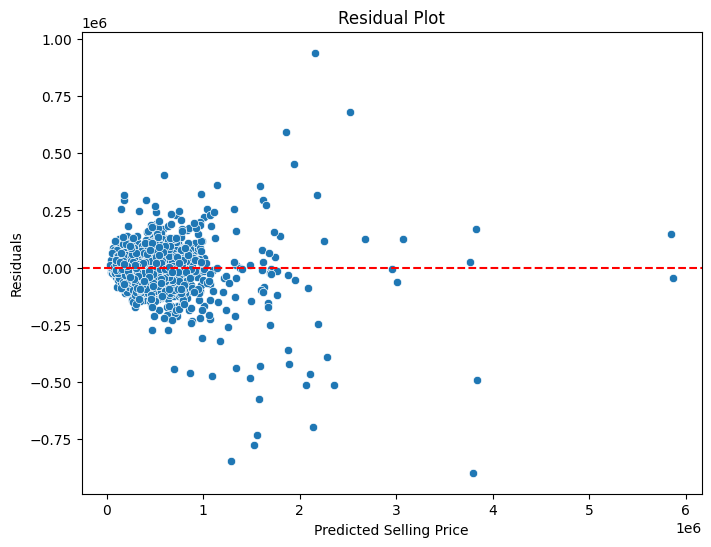

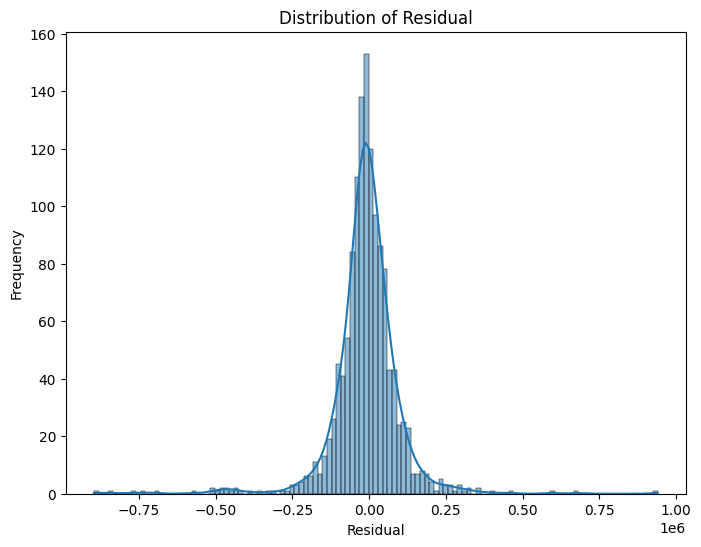

In [29]:

# Real selling prices (y_test) & estimated selling prices (y_predicted)
plt.figure(figsize=(8, 7))

# Plot actual selling prices in blue
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual Selling Price')

# Plot estimated selling prices in red
sns.scatterplot(x=y_test, y=y_predicted, color='red', label='Predicted Selling Price')

plt.title('The Actual vs The Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.show()

# Calculate residuals
residuals = y_test - y_predicted

# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_predicted, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Distribution of Residual
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residual')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()
